# State Reduction
- [PCA](#PCA)
- [LDA](#LDA)

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import game
from State import State

In [2]:
pd.options.display.max_columns = None
random.seed(10)
g = game.Game(quiet=True)
overwrite_models = False
resample = False
sns.set(rc={'figure.figsize':(12,8)})

## Data Simulation

In [3]:
def act_and_append(iters=250000):
    g = game.Game(quiet=True)
    X = [list(State(g).state)]
    y = [0]
    for _ in range(iters):
        action = random.randrange(16)
        init_points = g.points
        if ((len(g.dice) > 0) & (len([i for i in g.board if i.isnumeric()]) > 0)) | (g.jokers > 0):
            if g.board[action].isnumeric():
                next_die = g.dice[0]
                g.place_die(next_die,action+1)
            elif len([i for i in g.board if i.isnumeric()]) > 0:
                next_die = g.dice[0]
                adjusted_pos = min([int(i) for i in g.board if i.isnumeric()],key = lambda x: abs(x-action))
                g.place_die(next_die,adjusted_pos)
            elif (g.jokers > 0) & (action not in g.joker_on_board):
                g.place_joker(action+1)
            else:
                adjusted_pos = min([int(i) for i,v in enumerate(g.board) if i not in g.joker_on_board],key = lambda x: abs(x-action))
                g.place_joker(adjusted_pos+1)
                
        g.lock_n_roll()
        
        X.append(list(State(g).state))        
        if g.gameover:
            y.append(g.points - init_points - 500)
            g = game.Game(quiet=True)
            y.append(0)
            X.append(list(State(g).state))
        else:
            y.append(g.points - init_points)
        
    return np.array(X),np.array(y)

In [4]:
if resample:
    X,y = act_and_append()
    X = normalize(X)

    Xpckl = open('sample/X.pckl','wb')
    ypckl = open('sample/y.pckl','wb')
    pickle.dump(X,Xpckl)
    pickle.dump(y,ypckl)
    
    Xpckl.close()
    ypckl.close()
else:
    X = pickle.load(open('sample/X.pckl','rb'))
    y = pickle.load(open('sample/y.pckl','rb'))

In [5]:
data = pd.DataFrame(columns=State(g).labels,data=X)

In [6]:
data.head()

,JokerAv,Die0_B,Die0_G,Die0_R,Die0_Y,Die0_1,Die0_2,Die0_3,Die0_4,Die1_B,Die1_G,Die1_R,Die1_Y,Die1_1,Die1_2,Die1_3,Die1_4,Die2_B,Die2_G,Die2_R,Die2_Y,Die2_1,Die2_2,Die2_3,Die2_4,Die3_B,Die3_G,Die3_R,Die3_Y,Die3_1,Die3_2,Die3_3,Die3_4,Space0_CoveredByC_R,Space0_CoveredByC_B,Space0_CoveredByC_G,Space0_CoveredByC_Y,Space0_CoveredByN_1,Space0_CoveredByN_2,Space0_CoveredByN_3,Space0_CoveredByN_4,Space0_CoveredByJO,Move_0_Dist,Space1_CoveredByC_R,Space1_CoveredByC_B,Space1_CoveredByC_G,Space1_CoveredByC_Y,Space1_CoveredByN_1,Space1_CoveredByN_2,Space1_CoveredByN_3,Space1_CoveredByN_4,Space1_CoveredByJO,Move_1_Dist,Space2_CoveredByC_R,Space2_CoveredByC_B,Space2_CoveredByC_G,Space2_CoveredByC_Y,Space2_CoveredByN_1,Space2_CoveredByN_2,Space2_CoveredByN_3,Space2_CoveredByN_4,Space2_CoveredByJO,Move_2_Dist,Space3_CoveredByC_R,Space3_CoveredByC_B,Space3_CoveredByC_G,Space3_CoveredByC_Y,Space3_CoveredByN_1,Space3_CoveredByN_2,Space3_CoveredByN_3,Space3_CoveredByN_4,Space3_CoveredByJO,Move_3_Dist,Space4_CoveredByC_R,Space4_CoveredByC_B,Space4_CoveredByC_G,Space4_CoveredByC_Y,Space4_CoveredByN_1,Space4_CoveredByN_2,Space4_CoveredByN_3,Space4_CoveredByN_4,Space4_CoveredByJO,Move_4_Dist,Space5_CoveredByC_R,Space5_CoveredByC_B,Space5_CoveredByC_G,Space5_CoveredByC_Y,Space5_CoveredByN_1,Space5_CoveredByN_2,Space5_CoveredByN_3,Space5_CoveredByN_4,Space5_CoveredByJO,Move_5_Dist,Space6_CoveredByC_R,Space6_CoveredByC_B,Space6_CoveredByC_G,Space6_CoveredByC_Y,Space6_CoveredByN_1,Space6_CoveredByN_2,Space6_CoveredByN_3,Space6_CoveredByN_4,Space6_CoveredByJO,Move_6_Dist,Space7_CoveredByC_R,Space7_CoveredByC_B,Space7_CoveredByC_G,Space7_CoveredByC_Y,Space7_CoveredByN_1,Space7_CoveredByN_2,Space7_CoveredByN_3,Space7_CoveredByN_4,Space7_CoveredByJO,Move_7_Dist,Space8_CoveredByC_R,Space8_CoveredByC_B,Space8_CoveredByC_G,Space8_CoveredByC_Y,Space8_CoveredByN_1,Space8_CoveredByN_2,Space8_CoveredByN_3,Space8_CoveredByN_4,Space8_CoveredByJO,Move_8_Dist,Space9_CoveredByC_R,Space9_CoveredByC_B,Space9_CoveredByC_G,Space9_CoveredByC_Y,Space9_CoveredByN_1,Space9_CoveredByN_2,Space9_CoveredByN_3,Space9_CoveredByN_4,Space9_CoveredByJO,Move_9_Dist,Space10_CoveredByC_R,Space10_CoveredByC_B,Space10_CoveredByC_G,Space10_CoveredByC_Y,Space10_CoveredByN_1,Space10_CoveredByN_2,Space10_CoveredByN_3,Space10_CoveredByN_4,Space10_CoveredByJO,Move_10_Dist,Space11_CoveredByC_R,Space11_CoveredByC_B,Space11_CoveredByC_G,Space11_CoveredByC_Y,Space11_CoveredByN_1,Space11_CoveredByN_2,Space11_CoveredByN_3,Space11_CoveredByN_4,Space11_CoveredByJO,Move_11_Dist,Space12_CoveredByC_R,Space12_CoveredByC_B,Space12_CoveredByC_G,Space12_CoveredByC_Y,Space12_CoveredByN_1,Space12_CoveredByN_2,Space12_CoveredByN_3,Space12_CoveredByN_4,Space12_CoveredByJO,Move_12_Dist,Space13_CoveredByC_R,Space13_CoveredByC_B,Space13_CoveredByC_G,Space13_CoveredByC_Y,Space13_CoveredByN_1,Space13_CoveredByN_2,Space13_CoveredByN_3,Space13_CoveredByN_4,Space13_CoveredByJO,Move_13_Dist,Space14_CoveredByC_R,Space14_CoveredByC_B,Space14_CoveredByC_G,Space14_CoveredByC_Y,Space14_CoveredByN_1,Space14_CoveredByN_2,Space14_CoveredByN_3,Space14_CoveredByN_4,Space14_CoveredByJO,Move_14_Dist,Space15_CoveredByC_R,Space15_CoveredByC_B,Space15_CoveredByC_G,Space15_CoveredByC_Y,Space15_CoveredByN_1,Space15_CoveredByN_2,Space15_CoveredByN_3,Space15_CoveredByN_4,Space15_CoveredByJO,Move_15_Dist
0,0.0,0.353553,0.000000,0.0,0.000000,0.000000,0.000000,0.353553,0.000000,0.0,0.353553,0.0,0.000000,0.353553,0.000000,0.0,0.000000,0.0,0.353553,0.0,0.000000,0.0,0.353553,0.000000,0.000000,0.0,0.0,0.0,0.353553,0.000000,0.0,0.0,0.353553,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [7]:
data.drop_duplicates().shape

(251796, 193)

In [8]:
data.describe()

,JokerAv,Die0_B,Die0_G,Die0_R,Die0_Y,Die0_1,Die0_2,Die0_3,Die0_4,Die1_B,Die1_G,Die1_R,Die1_Y,Die1_1,Die1_2,Die1_3,Die1_4,Die2_B,Die2_G,Die2_R,Die2_Y,Die2_1,Die2_2,Die2_3,Die2_4,Die3_B,Die3_G,Die3_R,Die3_Y,Die3_1,Die3_2,Die3_3,Die3_4,Space0_CoveredByC_R,Space0_CoveredByC_B,Space0_CoveredByC_G,Space0_CoveredByC_Y,Space0_CoveredByN_1,Space0_CoveredByN_2,Space0_CoveredByN_3,Space0_CoveredByN_4,Space0_CoveredByJO,Move_0_Dist,Space1_CoveredByC_R,Space1_CoveredByC_B,Space1_CoveredByC_G,Space1_CoveredByC_Y,Space1_CoveredByN_1,Space1_CoveredByN_2,Space1_CoveredByN_3,Space1_CoveredByN_4,Space1_CoveredByJO,Move_1_Dist,Space2_CoveredByC_R,Space2_CoveredByC_B,Space2_CoveredByC_G,Space2_CoveredByC_Y,Space2_CoveredByN_1,Space2_CoveredByN_2,Space2_CoveredByN_3,Space2_CoveredByN_4,Space2_CoveredByJO,Move_2_Dist,Space3_CoveredByC_R,Space3_CoveredByC_B,Space3_CoveredByC_G,Space3_CoveredByC_Y,Space3_CoveredByN_1,Space3_CoveredByN_2,Space3_CoveredByN_3,Space3_CoveredByN_4,Space3_CoveredByJO,Move_3_Dist,Space4_CoveredByC_R,Space4_CoveredByC_B,Space4_CoveredByC_G,Space4_CoveredByC_Y,Space4_CoveredByN_1,Space4_CoveredByN_2,Space4_CoveredByN_3,Space4_CoveredByN_4,Space4_CoveredByJO,Move_4_Dist,Space5_CoveredByC_R,Space5_CoveredByC_B,Space5_CoveredByC_G,Space5_CoveredByC_Y,Space5_CoveredByN_1,Space5_CoveredByN_2,Space5_CoveredByN_3,Space5_CoveredByN_4,Space5_CoveredByJO,Move_5_Dist,Space6_CoveredByC_R,Space6_CoveredByC_B,Space6_CoveredByC_G,Space6_CoveredByC_Y,Space6_CoveredByN_1,Space6_CoveredByN_2,Space6_CoveredByN_3,Space6_CoveredByN_4,Space6_CoveredByJO,Move_6_Dist,Space7_CoveredByC_R,Space7_CoveredByC_B,Space7_CoveredByC_G,Space7_CoveredByC_Y,Space7_CoveredByN_1,Space7_CoveredByN_2,Space7_CoveredByN_3,Space7_CoveredByN_4,Space7_CoveredByJO,Move_7_Dist,Space8_CoveredByC_R,Space8_CoveredByC_B,Space8_CoveredByC_G,Space8_CoveredByC_Y,Space8_CoveredByN_1,Space8_CoveredByN_2,Space8_CoveredByN_3,Space8_CoveredByN_4,Space8_CoveredByJO,Move_8_Dist,Space9_CoveredByC_R,Space9_CoveredByC_B,Space9_CoveredByC_G,Space9_CoveredByC_Y,Space9_CoveredByN_1,Space9_CoveredByN_2,Space9_CoveredByN_3,Space9_CoveredByN_4,Space9_CoveredByJO,Move_9_Dist,Space10_CoveredByC_R,Space10_CoveredByC_B,Space10_CoveredByC_G,Space10_CoveredByC_Y,Space10_CoveredByN_1,Space10_CoveredByN_2,Space10_CoveredByN_3,Space10_CoveredByN_4,Space10_CoveredByJO,Move_10_Dist,Space11_CoveredByC_R,Space11_CoveredByC_B,Space11_CoveredByC_G,Space11_CoveredByC_Y,Space11_CoveredByN_1,Space11_CoveredByN_2,Space11_CoveredByN_3,Space11_CoveredByN_4,Space11_CoveredByJO,Move_11_Dist,Space12_CoveredByC_R,Space12_CoveredByC_B,Space12_CoveredByC_G,Space12_CoveredByC_Y,Space12_CoveredByN_1,Space12_CoveredByN_2,Space12_CoveredByN_3,Space12_CoveredByN_4,Space12_CoveredByJO,Move_12_Dist,Space13_CoveredByC_R,Space13_CoveredByC_B,Space13_CoveredByC_G,Space13_CoveredByC_Y,Space13_CoveredByN_1,Space13_CoveredByN_2,Space13_CoveredByN_3,Space13_CoveredByN_4,Space13_CoveredByJO,Move_13_Dist,Space14_CoveredByC_R,Space14_CoveredByC_B,Space14_CoveredByC_G,Space14_CoveredByC_Y,Space14_CoveredByN_1,Space14_CoveredByN_2,Space14_CoveredByN_3,Space14_CoveredByN_4,Space14_CoveredByJO,Move_14_Dist,Space15_CoveredByC_R,Space15_CoveredByC_B,Space15_CoveredByC_G,Space15_CoveredByC_Y,Space15_CoveredByN_1,Space15_CoveredByN_2,Space15_CoveredByN_3,Space15_CoveredByN_4,Space15_CoveredByJO,Move_15_Dist
count,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,264094.000000,2

In [9]:
len(X)

264094

In [10]:
len(y)

264094

In [11]:
y.min()

-500

In [12]:
y.mean()

-17.266829235045098

In [13]:
y[:10]

array([ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0])

In [14]:
y.max()

1110

## PCA

In [15]:
pcs_names = [f'PC{i}' for i,v in enumerate(data.columns)]
pca = PCA(n_components=len(X[0]))
pca.fit(X)

PCA(n_components=193)

Text(0.5, 0, 'Principal component')

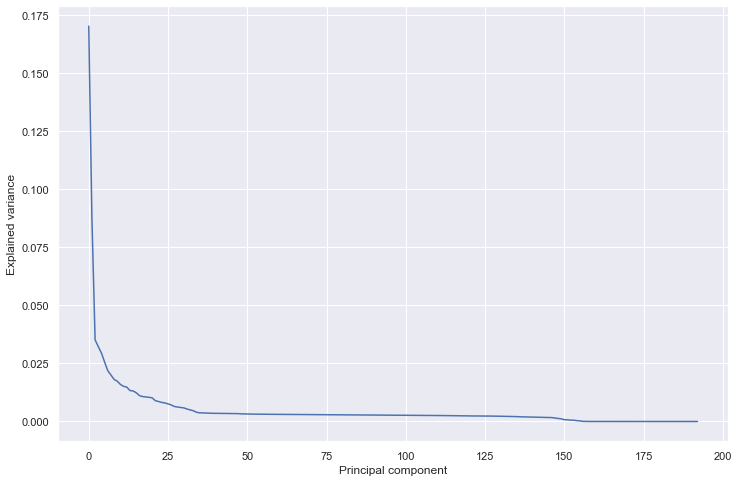

In [16]:
# create a scree plot
sns.lineplot(y = pca.explained_variance_ratio_, x = range(len(X[0])))
plt.ylabel('Explained variance')
plt.xlabel('Principal component')

Text(0.5, 0, 'Principal component')

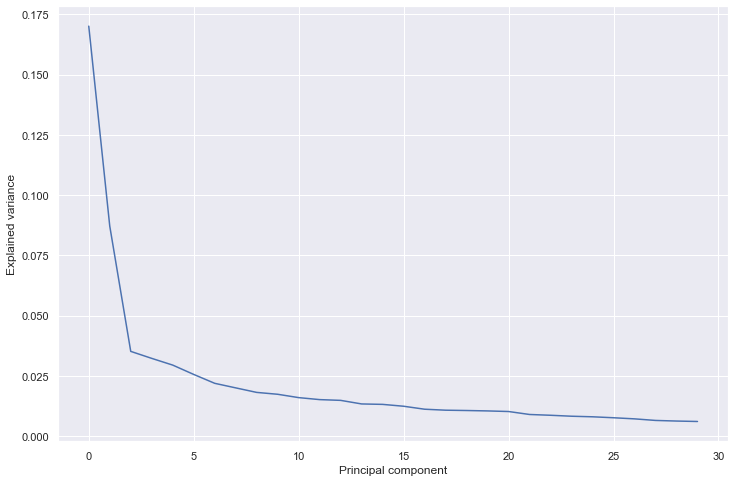

In [17]:
sns.lineplot(y = pca.explained_variance_ratio_[:30], x = range(30))
plt.ylabel('Explained variance')
plt.xlabel('Principal component')

In [18]:
for pc, var in zip(pcs_names,np.cumsum(pca.explained_variance_ratio_)):
    print(pc,var)

PC0 0.170116446273105
PC1 0.25725770838648643
PC2 0.29238302484328116
PC3 0.3246027880011437
PC4 0.3540344723266529
PC5 0.3795912645869575
PC6 0.40146081018705265
PC7 0.4214380590843547
PC8 0.4395357025815099
PC9 0.4568564532491851
PC10 0.4727885440602876
PC11 0.4878940980141255
PC12 0.5026849545481598
PC13 0.5159919406855293
PC14 0.5291180340343963
PC15 0.5414712907917291
PC16 0.552589361950457
PC17 0.5633039425583259
PC18 0.5738848255098083
PC19 0.5842963230446943
PC20 0.5944606144956198
PC21 0.6033934635129992
PC22 0.6119998983783885
PC23 0.6202087856870552
PC24 0.6281822051494431
PC25 0.6357581276291391
PC26 0.6428742449177219
PC27 0.6493365738286692
PC28 0.6555450057340765
PC29 0.6615711654364269
PC30 0.6674130113679553
PC31 0.6727699178664001
PC32 0.6777552648458798
PC33 0.6823666464748601
PC34 0.686322474958488
PC35 0.6900373575511511
PC36 0.6937336242025769
PC37 0.6973585552343872
PC38 0.700918874805867
PC39 0.7044400502173184
PC40 0.707945418478245
PC41 0.7114226260280663
PC42

In [19]:
selected_pca_comps = 154
pca_transform = PCA(n_components=selected_pca_comps)
pca_transform.fit(X)

PCA(n_components=154)

In [20]:
if overwrite_models:
    with open('model/pca.pckl','wb') as f:
        pickle.dump(pca_transform,f)

## LDA

In [21]:
clf = LinearDiscriminantAnalysis(solver='svd',store_covariance=True)
clf.fit(X, y)

C:\Users\michaelkeith\Anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "


LinearDiscriminantAnalysis(store_covariance=True)

Text(0.5, 0, 'component')

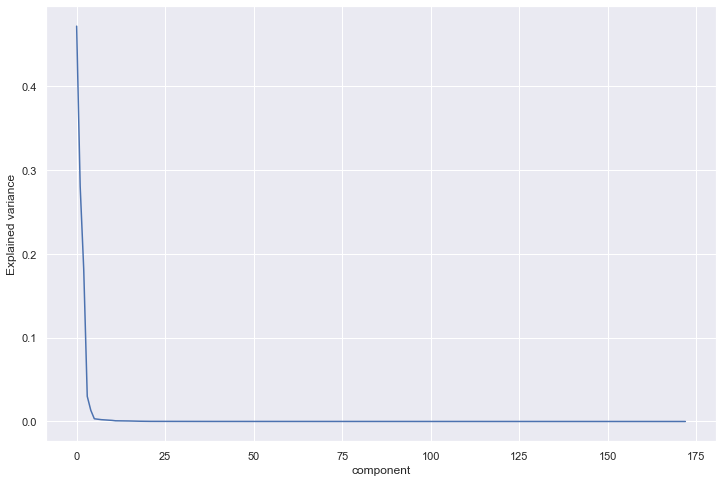

In [22]:
sns.lineplot(y = clf.explained_variance_ratio_, x = range(len(clf.explained_variance_ratio_)))
plt.ylabel('Explained variance')
plt.xlabel('component')

Text(0.5, 0, 'component')

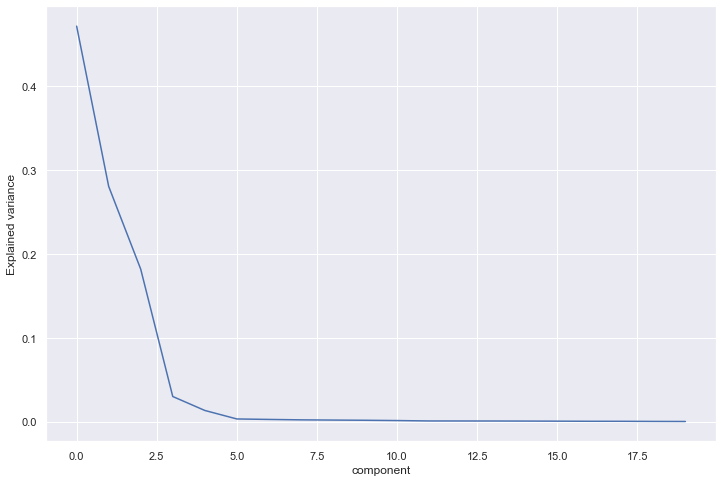

In [23]:
sns.lineplot(y = clf.explained_variance_ratio_[:20], x = range(20))
plt.ylabel('Explained variance')
plt.xlabel('component')

In [24]:
for i, var in enumerate(np.cumsum(clf.explained_variance_ratio_)):
    print(i,var)

0 0.4714269386009779
1 0.7518585001534777
2 0.9336282943515228
3 0.9636157890390553
4 0.9769764645952583
5 0.9802026703137361
6 0.9828656153520651
7 0.9850291571316611
8 0.9869340952721968
9 0.9886042038979159
10 0.9899250987844274
11 0.9907668286948939
12 0.9915793626532531
13 0.9923591197903882
14 0.993061552642981
15 0.9936618118604036
16 0.9941221578831425
17 0.9945632102367951
18 0.9948541311326827
19 0.9950654592261232
20 0.9952407945204732
21 0.9953864572951608
22 0.995519767471754
23 0.9956252659940744
24 0.9957269658709793
25 0.9958232050206732
26 0.9959181240126148
27 0.9960090246264379
28 0.9960982567459774
29 0.9961821193267788
30 0.9962650282857165
31 0.9963449118578279
32 0.9964232988176223
33 0.996499692909888
34 0.9965737671370963
35 0.9966467354697445
36 0.9967171849257244
37 0.9967856930078974
38 0.9968521945912848
39 0.996917603260765
40 0.9969823396852542
41 0.9970448807376919
42 0.9971067060606184
43 0.9971669828884214
44 0.9972266263387237
45 0.9972851728597358
46

In [25]:
selected_lda_comps = 16
lda_transform = LinearDiscriminantAnalysis(solver='svd',n_components=selected_lda_comps)
lda_transform.fit(X,y)

LinearDiscriminantAnalysis(n_components=16)

In [26]:
if overwrite_models:
    with open('model/lda.pckl','wb') as f:
        pickle.dump(lda_transform,f)